In [16]:
from dataloader_classes import Lung_Train_Dataset, Lung_Test_Dataset, Lung_Val_Dataset
# Torch
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms

import time
import matplotlib.pyplot as plt

In [6]:
ld_train = Lung_Train_Dataset()
ld_train.describe()
print(len(ld_train))
im, class_oh = ld_train[5215]
print(im.shape)
print(im)
print(class_oh)

This is the training dataset of the Lung Dataset used for the Small Project in the 50.039 Deep Learning class in Feb-March 2021. 
It contains a total of 5216 images, of size 150 by 150.
The images are stored in the following locations and each one contains the following number of images:
 - train_normal, in folder ./dataset/train/normal/: 1341 images.
 - train_infected(non_covid), in folder ./dataset/train/infected/non-covid/: 2530 images.
 - train_infected(covid), in folder ./dataset/train/infected/covid/: 1345 images.

5216
torch.Size([1, 150, 150])
tensor([[[0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]])
tensor([0., 0., 1.])


In [7]:
ld_test = Lung_Test_Dataset()
ld_test.describe()
print(len(ld_test))
im, class_oh = ld_test[476]
print(im.shape)
print(im)
print(class_oh)

This is the test dataset of the Lung Dataset used for the Small Project in the 50.039 Deep Learning class in Feb-March 2021. 
It contains a total of 615 images, of size 150 by 150.
The images are stored in the following locations and each one contains the following number of images:
 - test_normal, in folder ./dataset/test/normal/: 234 images.
 - test_infected(non_covid), in folder ./dataset/test/infected/non-covid/: 242 images.
 - test_infected(covid), in folder ./dataset/test/infected/covid/: 139 images.

615
torch.Size([1, 150, 150])
tensor([[[0.2588, 0.3725, 0.4314,  ..., 0.1176, 0.1255, 0.1333],
         [0.3686, 0.4196, 0.4549,  ..., 0.1137, 0.1216, 0.1255],
         [0.4392, 0.4275, 0.4510,  ..., 0.0941, 0.0941, 0.0941],
         ...,
         [0.1647, 0.1765, 0.1412,  ..., 0.1569, 0.1569, 0.1569],
         [0.1647, 0.1725, 0.1373,  ..., 0.1569, 0.1569, 0.1569],
         [0.1608, 0.1725, 0.1373,  ..., 0.1569, 0.1569, 0.1569]]])
tensor([0., 0., 1.])


In [8]:
ld_val = Lung_Val_Dataset()
ld_val.describe()
print(len(ld_val))
im, class_oh = ld_val[15]
print(im.shape)
print(im)
print(class_oh)

This is the validation dataset of the Lung Dataset used for the Small Project in the 50.039 Deep Learning class in Feb-March 2021. 
It contains a total of 25 images, of size 150 by 150.
The images are stored in the following locations and each one contains the following number of images:
 - val_normal, in folder ./dataset/val/normal/: 8 images.
 - val_infected(non_covid), in folder ./dataset/val/infected/non-covid: 8 images.
 - val_infected(covid), in folder ./dataset/val/infected/covid: 9 images.

25
torch.Size([1, 150, 150])
tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0078, 0.0039, 0.0039,  ..., 0.0078, 0.0118, 0.0157],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]])
tensor([0., 1., 0.])


In [9]:
bs_val = 4

In [10]:
# creating dataloader object
train_loader = DataLoader(ld_train, batch_size = 64, shuffle = True)
print(train_loader)
test_loader = DataLoader(ld_test, batch_size = bs_val, shuffle = True)
print(test_loader)
val_loader = DataLoader(ld_val, batch_size = bs_val, shuffle = True)
print(val_loader)

In [11]:
# Typical mini-batch for loop on dataloader (train)
for k, v in enumerate(train_loader):
    print("-----")
    print(k)
    print(v[0])
    print(v[1])
    # Forced stop
    break
    #assert False, "Forced stop after one iteration of the for loop"

-----
0
tensor([[[[0.0000, 0.0039, 0.0000,  ..., 0.3216, 0.3255, 0.3098],
          [0.0000, 0.0078, 0.0000,  ..., 0.3255, 0.3294, 0.3098],
          [0.0000, 0.0078, 0.0000,  ..., 0.3333, 0.3294, 0.3059],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.1333, 0.1529, 0.1647,  ..., 0.1882, 0.1882, 0.1843],
          [0.1412, 0.1569, 0.1608,  ..., 0.1922, 0.1882, 0.1882],
          [0.1569, 0.1608, 0.1569,  ..., 0.1922, 0.1961, 0.1961],
          ...,
          [0.2431, 0.2314, 0.2196,  ..., 0.4353, 0.4157, 0.4157],
          [0.2392, 0.2275, 0.2157,  ..., 0.4431, 0.4157, 0.4157],
          [0.2353, 0.2275, 0.2157,  ..., 0.4471, 0.4196, 0.4118]]],


        [[[0.2157, 0.2078, 0.2039,  ..., 0.0706, 0.0667, 0.0196],
          [0.3922, 0.3725, 0.3412,  ..., 0.1137, 0.2510, 0.1255],
          [0.4392, 0.4353, 0.4

Testing of the dataloader

In [18]:
class Block(nn.Module):
    def __init__(self,in_channel,out_channel,dropout_rate):
        super(Block,self).__init__()
        self.layer1=nn.Sequential(
            nn.Conv2d(in_channel,out_channel,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(out_channel),
            nn.ReLU()
        )
        
        self.layer2=nn.Sequential(
            nn.Conv2d(out_channel,out_channel,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(out_channel),
            nn.ReLU()
        )

        self.dropout=nn.Dropout(dropout_rate)

    def forward(self,x):
        out=self.layer1(x)
        out=self.layer2(out)
        out=self.dropout(out)

        return out


class Classifier(nn.Module):
    def __init__(self):
        super(Classifier,self).__init__()
        self.conv1=nn.Sequential(
            nn.Conv2d(1,16,kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3,stride=2)
        )

        # self.blk1=Block(16,8,0.5)
        # self.blk2=Block(64,128,0.2)
        # self.blk3=Block(128,256,0.2)
        # self.blk4=Block(256,512,0.2)

        # self.avgpool=nn.AvgPool2d(kernel_size=3,stride=1,padding=1)
        self.fc1=nn.Linear(16*72*72,3)
        self.drop=nn.Dropout(0.5)
        # self.fc2=nn.Linear(256,3)
        self.fl=nn.LogSoftmax(dim=1)

    def forward(self,x):
        out=self.conv1(x)

        # out=self.blk1(out)
        # out=self.blk2(out)
        # out=self.blk3(out)
        # out=self.blk4(out)

        # out=self.avgpool(out)
        out=out.reshape(out.size(0), -1)
        out=self.fc1(out)
        out=self.drop(out)
        # out=self.fc2(out)   
        out=self.fl(out)

        return out

In [13]:
def calculate_accuracy(predicted_labels,target_labels):
    maxProb_idx = torch.max(predicted_labels,1)[1]
    
    equality = torch.eq(torch.max(target_labels,1)[1],maxProb_idx).float()
    # print("equality  ",equality)
    accuracy = torch.mean(equality)

    # print("predicted label  ",predicted_labels)
    # print("tarfet leable  ",target_labels)
    # print("accuracy   ",accuracy)
    return accuracy

def validation(model, validation_loader, criterion):
    validation_loss = 0
    accuracy = 0
    
    for images, labels in validation_loader:
                
        outputs = model(images)
        validation_loss += criterion(outputs, torch.max(labels,1)[1]).item()
        
        accuracy += calculate_accuracy(outputs,labels)


    return validation_loss, accuracy

In [14]:
def train_model(train_loader,epochs,loss_function):
    model=Classifier()

    criterion=loss_function
    optimizer=optim.Adam(model.parameters(),lr=0.001)

    train_loss_list=[]
    train_accuracy_list=[]

    acc_list=[]
    val_acc_list=[]

    losslst_train=[]
    losslst_val=[]

    start_time=time.time()
    for epoch in range(epochs):
        model.train()
        for batch_idx, (images_data, target_labels) in enumerate(train_loader):
            print(batch_idx, '----------------------')
            target_idx_labels=torch.max(target_labels,1)[1]
            # print("image data ",images_data)
            outputs=model(images_data)
            # print("output   ",outputs)
            loss=criterion(outputs,target_idx_labels)
            train_loss_list.append(loss.item())
            accuracy=calculate_accuracy(outputs,target_labels)
            train_accuracy_list.append(accuracy)
            print(train_accuracy_list)
            # print("loss ", training_loss_list)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            

            if (batch_idx+1)%10==0:
                model.eval()
                with torch.no_grad():
                    validation_loss,validation_accuracy=validation(model,test_loader,criterion=loss_function)

                print("Epoch: {}/{} @ {} ".format(epoch, epochs,time.time()),
                      "\n",
                      "Training Loss: {:.3f} - ".format(sum(train_loss_list)/len(train_loss_list)),
                      "Training Accuracy: {:.3f} - ".format(sum(train_accuracy_list)/len(train_accuracy_list)),
                      "Validation Loss: {:.3f} - ".format(validation_loss/len(test_loader)),
                      "Validation Accuracy: {:.3f}".format(validation_accuracy/len(test_loader)))
                
                acc_list.append(sum(train_accuracy_list)/len(train_accuracy_list))
                val_acc_list.append(validation_accuracy/len(test_loader))
                losslst_train.append(sum(train_loss_list)/len(train_loss_list))
                losslst_val.append(validation_accuracy/len(test_loader))

                
                train_loss_list=[]
                train_accuracy_list=[]

                model.train()
    fig,axs=plt.subplots(2)
    axs[0].plot(acc_list,label='train acc')
    axs[0].plot(val_acc_list,label='val acc')
    axs[1].plot(losslst_train,label='train loss')
    axs[1].plot(losslst_val,label='val loss')
    plt.legend()
    plt.show()

    print("Training finished!","\n","Run time: {:.3f} mins".format((time.time() - start_time)/60))
    return model

]
Epoch: 3/5 @ 1615910927.6857018  
 Training Loss: 0.664 -  Training Accuracy: 0.634 -  Validation Loss: 0.880 -  Validation Accuracy: 0.654
10 ----------------------
[tensor(0.6719)]
11 ----------------------
[tensor(0.6719), tensor(0.6875)]
12 ----------------------
[tensor(0.6719), tensor(0.6875), tensor(0.6875)]
13 ----------------------
[tensor(0.6719), tensor(0.6875), tensor(0.6875), tensor(0.6875)]
14 ----------------------
[tensor(0.6719), tensor(0.6875), tensor(0.6875), tensor(0.6875), tensor(0.4688)]
15 ----------------------
[tensor(0.6719), tensor(0.6875), tensor(0.6875), tensor(0.6875), tensor(0.4688), tensor(0.5781)]
16 ----------------------
[tensor(0.6719), tensor(0.6875), tensor(0.6875), tensor(0.6875), tensor(0.4688), tensor(0.5781), tensor(0.6875)]
17 ----------------------
[tensor(0.6719), tensor(0.6875), tensor(0.6875), tensor(0.6875), tensor(0.4688), tensor(0.5781), tensor(0.6875), tensor(0.5938)]
18 ----------------------
[tensor(0.6719), tensor(0.6875), tensor(

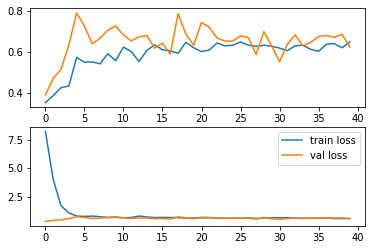

Training finished! 
 Run time: 9.778 mins


Classifier(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=82944, out_features=3, bias=True)
  (drop): Dropout(p=0.5, inplace=False)
  (fl): LogSoftmax()
)

In [19]:
loss_function=nn.NLLLoss()
train_model(train_loader,5,loss_function)